In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv("Womens Clothing E-Commerce Reviews.csv").iloc[:,1:]
data.head()

,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


In [3]:
sentence = data['Review Text'][1]
print(sentence)

Love this dress!  it's sooo pretty.  i happened to find it in a store, and i'm glad i did bc i never would have ordered it online bc it's petite.  i bought a petite and am 5'8".  i love the length on me- hits just a little below the knee.  would definitely be a true midi on someone who is truly petite.


#### 1. Using Vader (NLTK)

In [24]:
import nltk
# nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()
sid.polarity_scores(sentence)

{'neg': 0.0, 'neu': 0.664, 'pos': 0.336, 'compound': 0.9729}

#### 2. Using TextBlob

In [25]:
from textblob import TextBlob

TextBlob(sentence).sentiment

Sentiment(polarity=0.33958333333333335, subjectivity=0.7250000000000001)

#### 3. Using Flair

In [4]:
import flair

flair_sentiment = flair.models.TextClassifier.load('en-sentiment')

2020-09-28 22:45:13,887 loading file /Users/pradeepbhandari/.flair/models/sentiment-en-mix-distillbert_3.1.pt


In [34]:
s = flair.data.Sentence(sentence)

flair_sentiment.predict(s)

total_sentiment = s.labels
total_sentiment

[POSITIVE (0.9999)]

### Estimating score for each word

NLTK sentiment

Love : 0.6369
the : 0.0
color : 0.0
and : 0.0
style, : 0.0
but : 0.0
material : 0.0
snags : 0.0
easily : 0.34


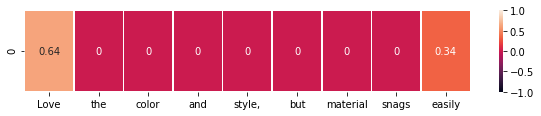

In [35]:
sample_review = data.loc[52,"Review Text"]

# NLTK
print("NLTK sentiment\n")
for word in sample_review.split():
    print("{} : {}".format(word, sid.polarity_scores(word)['compound']))
    
sentiment_score_nltk = [sid.polarity_scores(word)['compound'] for word in sample_review.split()]
plt.figure(figsize=(10,1.5))
sns.heatmap([sentiment_score_nltk], vmin=-1,vmax=1, xticklabels=sample_review.split(), annot=True, linewidths=.5)
plt.show()
# sentiment_score_nltk

TextBlob sentiment

Love : 0.5
the : 0.0
color : 0.0
and : 0.0
style, : 0.0
but : 0.0
material : 0.0
snags : 0.0
easily : 0.43333333333333335


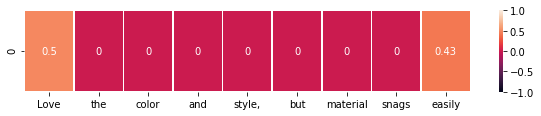

In [36]:
sample_review = data.loc[52,"Review Text"]

# Text Blob
print("TextBlob sentiment\n")
for word in sample_review.split():
    print("{} : {}".format(word, TextBlob(word).sentiment.polarity))
    
sentiment_score_tblob = [TextBlob(word).sentiment.polarity for word in sample_review.split()]

plt.figure(figsize=(10,1.5))
sns.heatmap([sentiment_score_tblob], vmin=-1,vmax=1, xticklabels=sample_review.split(), annot=True, linewidths=.5)
plt.show()

In [5]:
def get_flair_score(x):
    
    s = flair.data.Sentence(x)
    flair_sentiment.predict(s)
    confidence, polarity = s.labels[0].score, s.labels[0].value

    flair_score = -confidence if polarity=='NEGATIVE' else confidence

    return flair_score

Love : 0.9770276546478271
the : 0.7761563658714294
color : 0.6967114806175232
and : 0.8806753754615784
style, : 0.9989508390426636
but : 0.595790684223175
material : 0.9881475567817688
snags : -0.8319994807243347
easily : 0.9928234815597534


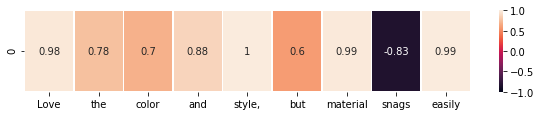

In [6]:
sample_review = data.loc[52,"Review Text"]

word_sentiment_score_flair = []
for word in sample_review.split():
    
    flair_score = get_flair_score(word)
    print("{} : {}".format(word, flair_score))
    
    word_sentiment_score_flair.append(flair_score)
    
plt.figure(figsize=(10,1.5))
sns.heatmap([word_sentiment_score_flair], vmin=-1,vmax=1, xticklabels=sample_review.split(), annot=True, linewidths=.5)
plt.show()

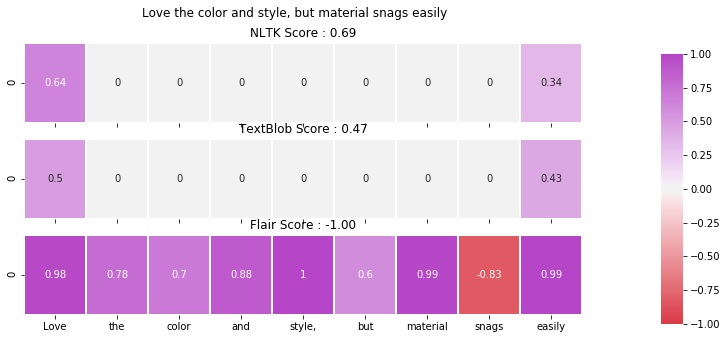

In [41]:
sample_review = data.loc[52,"Review Text"]

# NLTK
word_sentiment_score_nltk = [sid.polarity_scores(word)['compound'] for word in sample_review.split()]
overall_score_nltk = sid.polarity_scores(sample_review)['compound']

# TextBlob
word_sentiment_score_tblob = [TextBlob(word).sentiment.polarity for word in sample_review.split()]
overall_score_tblob = TextBlob(sample_review).sentiment.polarity

# Flair
word_sentiment_score_flair = [get_flair_score(word) for word in sample_review.split()]
overall_score_flair = get_flair_score(sample_review)

fig, ax = plt.subplots(3,1, figsize=(10,5), sharex=True)
cbar_ax = fig.add_axes([1.01,.1,.03,.75])

# Visualize
scores_overall = [overall_score_nltk, overall_score_tblob, overall_score_flair]
labels = ["NLTK", "TextBlob", "Flair"]
scores_words = [word_sentiment_score_nltk, word_sentiment_score_tblob, word_sentiment_score_flair]

for i, (lab, so, sw) in enumerate(np.array([labels, scores_overall, scores_words]).T):
       
    sns.heatmap([sw], vmin=-1,vmax=1, cbar_ax=cbar_ax, cmap=sns.diverging_palette(10, 300, as_cmap=True), xticklabels=sample_review.split(), annot=True, linewidths=.5, ax=ax[i])
    ax[i].set_title("%s Score : %.2f"%(lab, so))
    
fig.suptitle(sample_review)

# fig.tight_layout()
plt.show()




In [47]:
def compare_sentiment_methods(sample_review):
    
    # NLTK
    word_sentiment_score_nltk = [sid.polarity_scores(word)['compound'] for word in sample_review.split()]
    overall_score_nltk = sid.polarity_scores(sample_review)['compound']

    # TextBlob
    word_sentiment_score_tblob = [TextBlob(word).sentiment.polarity for word in sample_review.split()]
    overall_score_tblob = TextBlob(sample_review).sentiment.polarity

    # Flair
    word_sentiment_score_flair = [get_flair_score(word) for word in sample_review.split()]
    overall_score_flair = get_flair_score(sample_review)
    
    
     # Visualize
    fig, ax = plt.subplots(3,1, figsize=(10,5), sharex=True)
    cbar_ax = fig.add_axes([1.01,.1,.03,.75])
    cmap = sns.diverging_palette(10, 300, as_cmap=True)
   
    scores_overall = [overall_score_nltk, overall_score_tblob, overall_score_flair]
    labels = ["NLTK", "TextBlob", "Flair"]
    scores_words = [word_sentiment_score_nltk, word_sentiment_score_tblob, word_sentiment_score_flair]

    for i, (lab, so, sw) in enumerate(np.array([labels, scores_overall, scores_words]).T):

        sns.heatmap([sw], vmin=-1,vmax=1, cbar_ax=cbar_ax, cmap=cmap,xticklabels=sample_review.split(), annot=True, linewidths=.5, ax=ax[i])
        ax[i].set_title("%s Score : %.2f"%(lab, so))

    fig.suptitle(sample_review)

#     fig.tight_layout()
    plt.show()


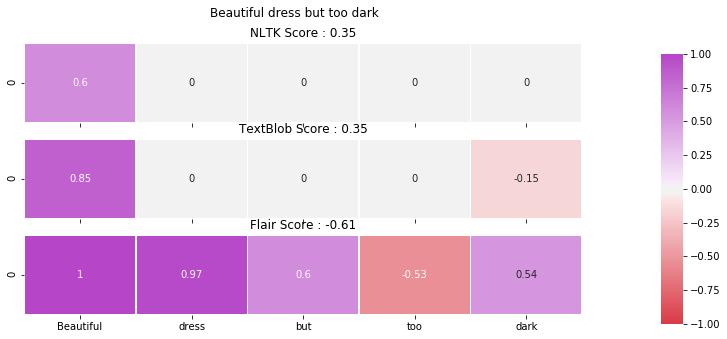

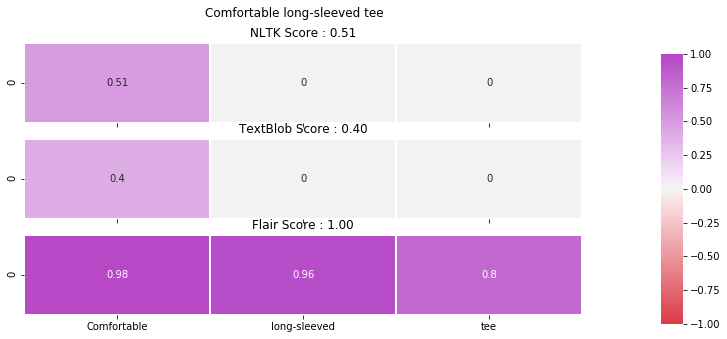

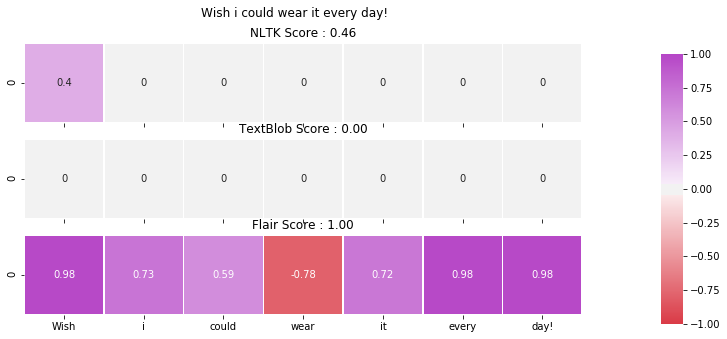

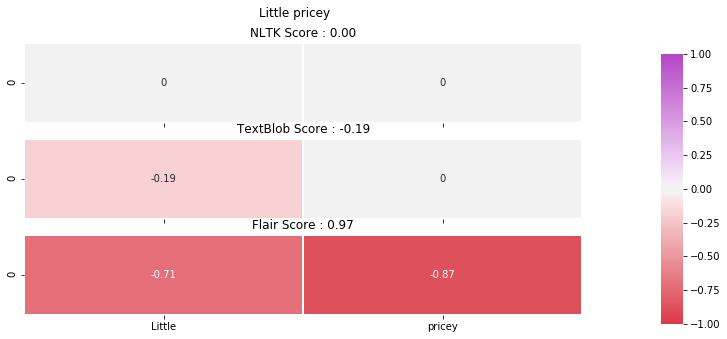

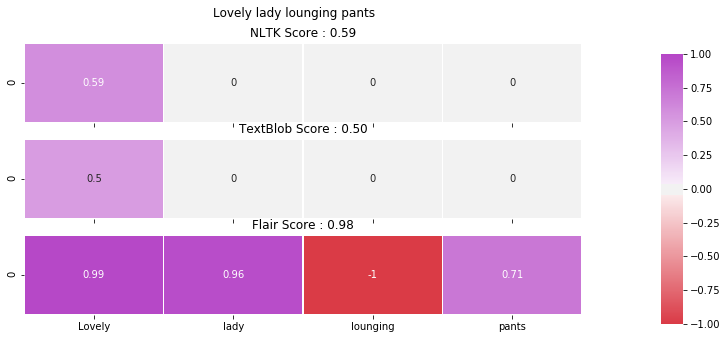

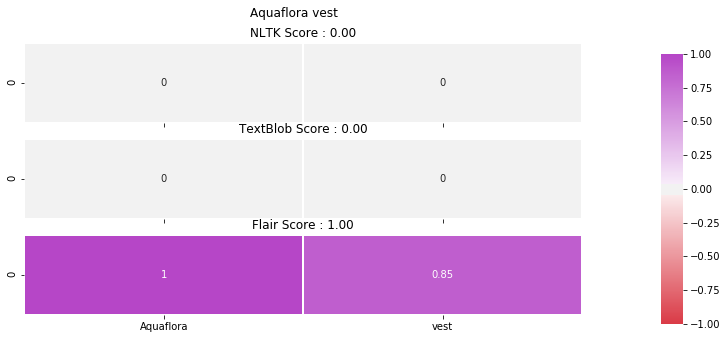

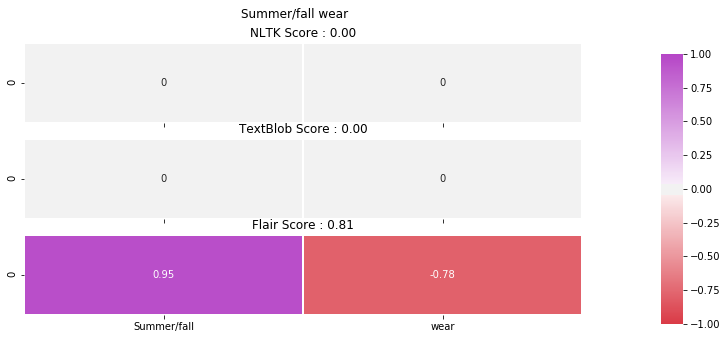

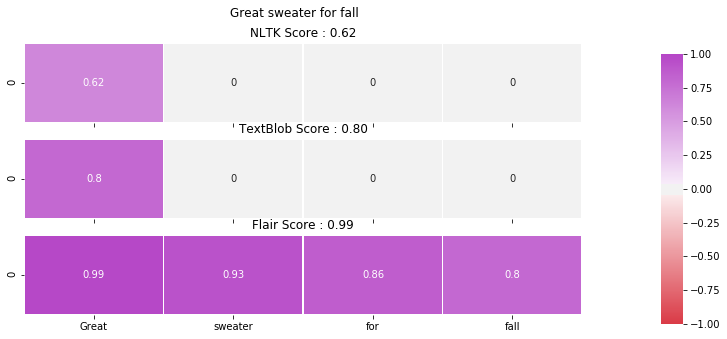

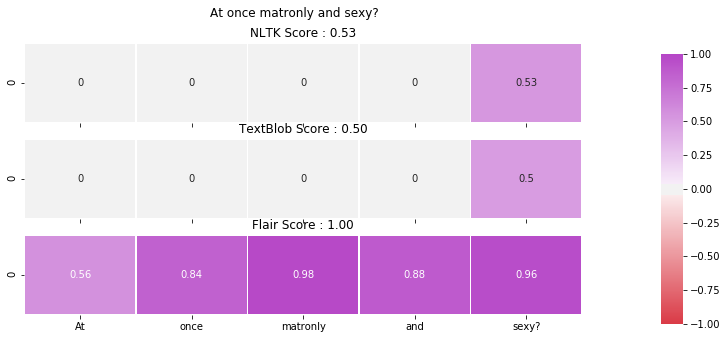

In [48]:
# Take n = 10 sample reviews
n = 10
sample_reviews = data.sample(n)['Title'].dropna()

for review in sample_reviews:
    compare_sentiment_methods(review)

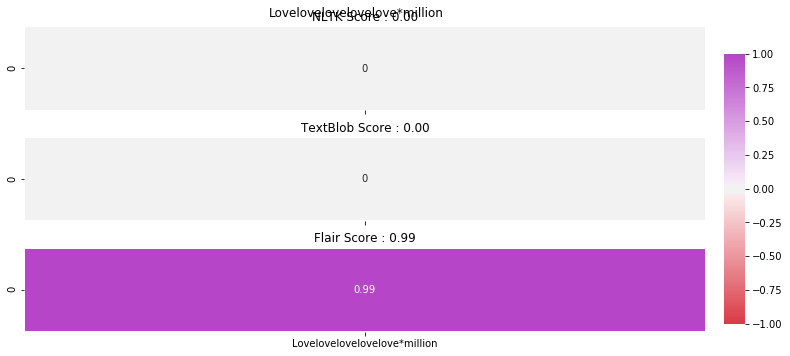

In [46]:
compare_sentiment_methods("Lovelovelovelovelove*million")

In [9]:
def get_flair_score(x):
    
    try :
        s = flair.data.Sentence(x)
        flair_sentiment.predict(s)
        confidence, polarity = s.labels[0].score, s.labels[0].value
        flair_score = -confidence if polarity=='NEGATIVE' else confidence
        return flair_score
    
    except:
        return -99

#### Uncomment below to Run Sentiment Prediction

In [13]:
# df = data.copy()

# # Add Review Sentiment to data
# df['Review Sentiment'] = df['Review Text'].apply(lambda x : get_flair_score(x))

# # Add Title Sentitment to data
# df['Title Sentiment'] = df['Title'].apply(get_flair_score)

In [15]:
# Perform K-means clustering on review data
df

,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name,Review Sentiment,Title Sentiment
0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates,0.999423,-99.000000
1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses,0.999910,-99.000000
2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses,-0.999981,-0.999869
3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants,0.998425,0.999400
4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses,0.999157,0.639608
...,...,...,...,...,...,...,...,...,...,...,...,...
23481,1104,34,Great dress for many occasions,I was very happy to snag this dress at such a ...,5,1,0,General Petite,Dresses,Dresses,0.999796,0.996868
23482,862,48,Wish it was made of cotton,"It reminds me of maternity clothes. soft, stre...",3,1,0,General Petite,Tops,Knits,-0.999807,-0.997335
23483,1104,31,"Cute, but see through","This fit well, but the top was very see throug...",3,0,1,General Petite,Dresses,Dresses,-0.999916,-0.530369
23484,1084,28,"Very cute dress, perfect for summer parties an...",I bought this dress for a wedding i have this ...,3,1,2,General,Dresses,Dresses,-0.999735,0.997840


In [28]:
from wordcloud import WordCloud

In [34]:
lista = []
for word in data['Review Text'].dropna():
    word = word.split()
    for n in word:
        lista.append(n)
        
lista = " ".join(lista)

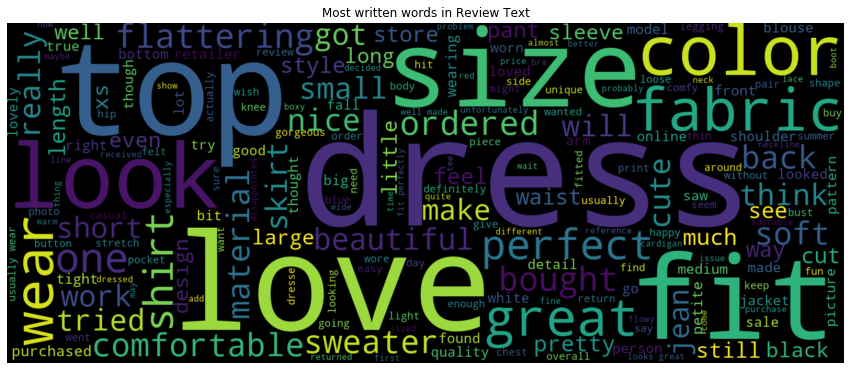

In [35]:
# World Cloud

wordcloud = WordCloud(width=1600, height=650, margin=0).generate(lista)

plt.figure(figsize=(15,15))
plt.title('Most written words in Review Text')
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()

In [45]:
import re
from nltk.corpus import stopwords
def get_text(text):
    text = text.lower()

    text = re.sub("I'm",'I m',text)
    text = re.sub(":", " ", text)
    text = re.sub("He's","he is", text)
    text = re.sub(r"i'm", "i am", text)
    text = re.sub(r"he's", "he is", text)
    text = re.sub(r"she's", "she is", text)
    text = re.sub(r"that's", "that is", text)        
    text = re.sub(r"what's", "what is", text)
    text = re.sub(r"where's", "where is", text) 
    text = re.sub(r"\'ll", " will", text)  
    text = re.sub(r"\'ve", " have", text)  
    text = re.sub(r"\'re", " are", text)
    text = re.sub(r"\'d", " would", text)
    text = re.sub(r"\'ve", " have", text)
    text = re.sub(r"won't", "will not", text)
    text = re.sub(r"don't", "do not", text)
    text = re.sub(r"did't", "did not", text)
    text = re.sub(r"can't", "can not", text)
    text = re.sub(r"it's", "it is", text)
    text = re.sub(r"couldn't", "could not", text)
    text = re.sub(r"have't", "have not", text)
    text = re.sub(r"[,.\"!@#$%^&*(){}?/;`~:<>+=-]", "", text)
    text = re.sub(r"[00-99]", "", text)
    text = re.sub(r"none", "", text)

#     nopunc = [char for char in text if char not in string.punctuation] # del punctuation
#     nopunc = "".join(nopunc)

    nopunc = [char for char in text] # del punctuation
    nopunc = "".join(nopunc)
    
    clean = [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]   # or get_stop_words('english')
    clean = " ".join(clean)
    
    clean2 = [word for word in clean.split() if len(word) > 1] # get len more than 1 (del A, I, s, d)
    clean2 = " ".join(clean2)
    return clean2

train = data.copy()

train['Review Text1'] = train['Review Text'].dropna().apply(get_text)
train['Title1'] = train['Title'].dropna().apply(get_text)


In [46]:
lista = []
for word in data['Review Text'].dropna():
    word = word.split()
    for n in word:
        lista.append(n)
        
lista = " ".join(lista)

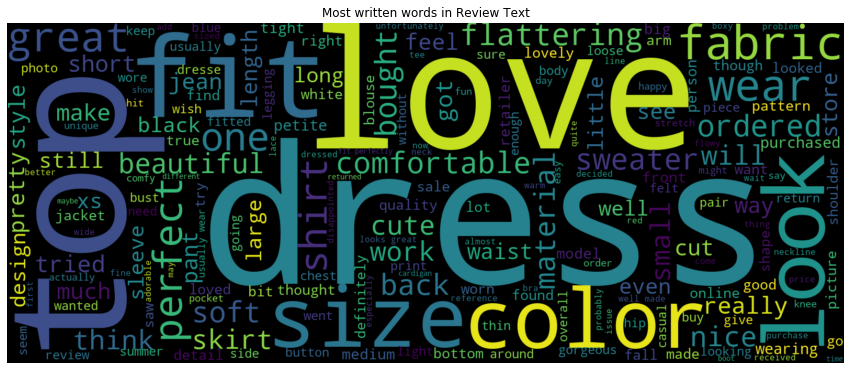

In [47]:
# World Cloud

wordcloud = WordCloud(width=1600, height=650, margin=0).generate(lista)

plt.figure(figsize=(15,15))
plt.title('Most written words in Review Text')
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()

In [50]:
lista1 = []
for word in data['Title'].dropna():
    word = word.split()
    for n in word:
        lista1.append(n)
        
lista1 = " ".join(lista1)

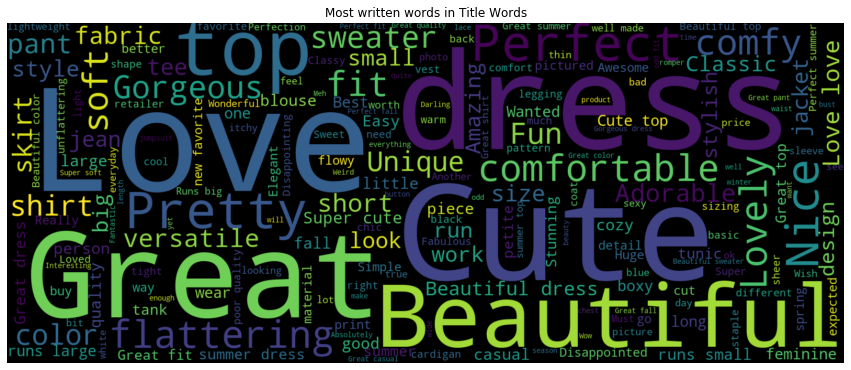

In [51]:
wordcloud1 = WordCloud(width=1600, height=650, margin=0).generate(lista1)
plt.figure(figsize=(15,15))
plt.title('Most written words in Title Words')
plt.imshow(wordcloud1, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()

In [57]:
train = train.dropna(subset=['Review Text'])
recommended = train[train['Recommended IND']==1]
recommended_list = []
for word in recommended['Review Text1']:
    word = word.split()
    for n in word:
        recommended_list.append(n)
recommended_list = " ".join(recommended_list)
not_recommended_list = []
not_recommended = train[train['Recommended IND']==0]
for word in not_recommended['Review Text1']:
    word = word.split() 
    for n in word:
        not_recommended_list.append(n)
not_recommended_list = " ".join(not_recommended_list)

In [58]:
recomendedcloud = WordCloud(width=1600, height=650, margin=0).generate(recommended_list)
notrecomendedcloud = WordCloud(width=1600, height=650, margin=0).generate(not_recommended_list)

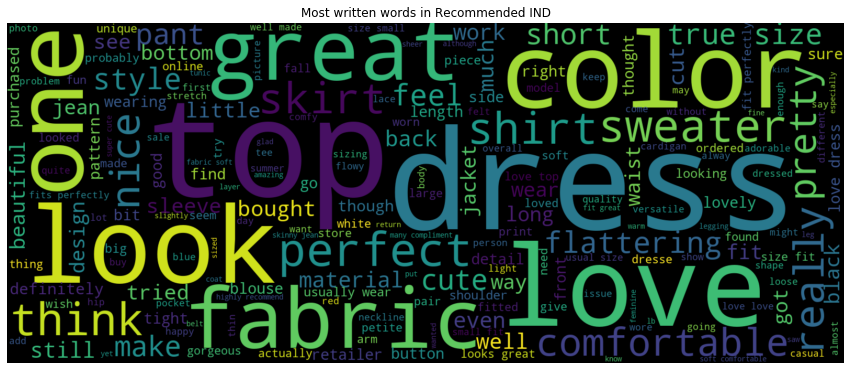

In [59]:
plt.figure(figsize=(15,15))
recomendedcloud
plt.imshow(recomendedcloud, interpolation='bilinear')
plt.title('Most written words in Recommended IND')
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()

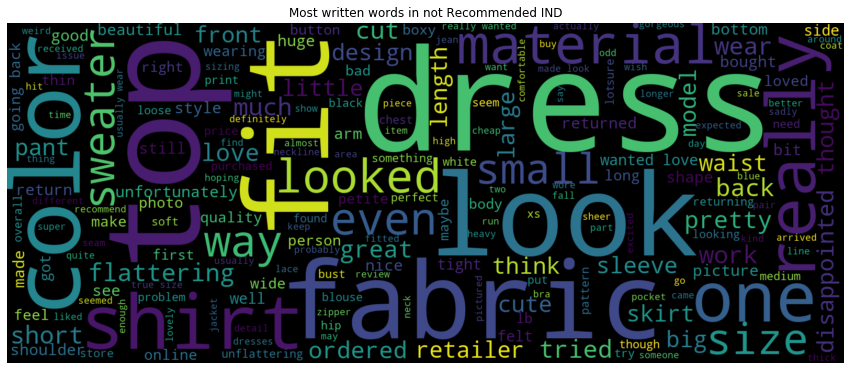

In [60]:
plt.figure(figsize=(15,15))
notrecomendedcloud
plt.imshow(notrecomendedcloud, interpolation='bilinear')
plt.title('Most written words in not Recommended IND')
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()

In [2]:
Top Words in Rating = 5

love
color
great
comfortable
look
one
perfect
Words to consider when designing women's clothing: comfortable, soft, beautiful, well made, detail, design, versatile


SyntaxError: invalid syntax (<ipython-input-2-faf563c2e048>, line 1)

In [22]:

# TRAIN / TEST THE SETS
# ROW FILTERING
# CLUSTERING
# DIMENTIONALITY REDUCTION
# TEXT SUMMRISATION, TEXT BLOB
# TOPIC MODELLING IN ONE CATEGORY, CATEGORIES THE REVIEW, WHAT ARE THE DIFFERENCT TOPICS CUSTOMERS TALKING ABOUT AND 
# COONERLATE ON THE TOPICS
# SENTIMENTAL ANALYSIS
# TF - IDF MODEL
# LOWERING 
# PUNCTUATION
# COMMAND, TOKENISATION
# CLASSIFICATION PROBLEMS ON REVIEWS
\
# ANALYSE DIFFERENT ASPECTS OF PRODUCTS REVIEWS 
# ANALYSE DIFFERENT ASPECTS OF PRODUCTS AND RATINGS
# ANALYSE AGE GROUPS V RATINGS
# ANALYSE AGE GROUPS V REVIEWS


# FUTURE WORK
 # TRY TO PREDICT THE RATINGS
# IS IT POSSIBLE TO ANALYSE THE TIME CUSTOMERS POST THE REVIEWS/RATINGS BY DOING SOME NLP??
# PREDICTING THE RATINGS
# A/B TESTING